In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

#

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#

import xgboost as xgb
import lightgbm as lgt

#

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_tr=pd.read_csv('train.csv')
df_te=pd.read_csv('test.csv')

In [3]:
print('Train shape:')
display(df_tr.shape)
print('Test shape:')
display(df_te.shape)

Train shape:


(891, 12)

Test shape:


(418, 11)

In [4]:
display(df_tr.head())
display(df_tr.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df_tr.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [6]:
print('Train columns:', df_tr.columns.tolist())
print('Test columns:', df_te.columns.tolist())

Train columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Test columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [7]:
#X=df_tr[['Sex', 'Pclass']]
#X=pd.get_dummies(data=X, columns=['Sex', 'Pclass'])
#x=df_te[['Sex', 'Pclass']]
#x=pd.get_dummies(data=x, columns=['Sex', 'Pclass'])
#y=df_tr['Survived']
#logreg = LogisticRegression()
#logreg.fit(X,y)
#df_te['Survived'] = logreg.predict(x)

In [8]:
df_tr['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [9]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


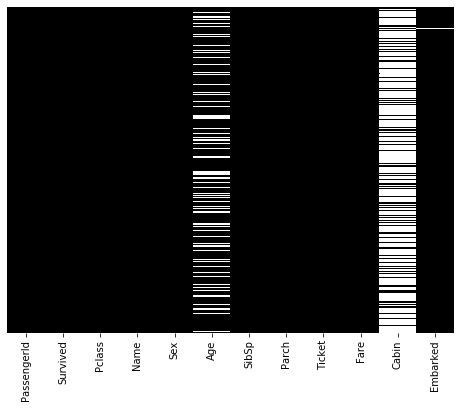

In [10]:
plt.subplots(figsize=(8, 6))
sns.heatmap(df_tr.isnull(), yticklabels = False,cbar = False, cmap='cubehelix')
plt.show()

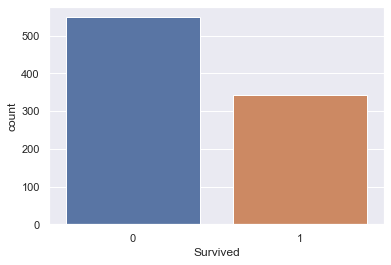

In [11]:
sns.set()
sns.countplot(df_tr['Survived'])
plt.show()

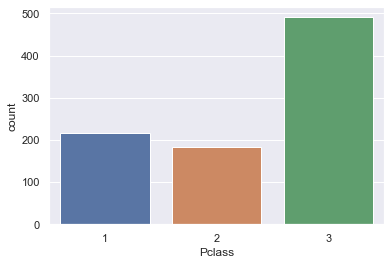

In [12]:
sns.countplot(df_tr['Pclass'])
plt.show()

In [13]:
df_tr.Name.nunique()

891

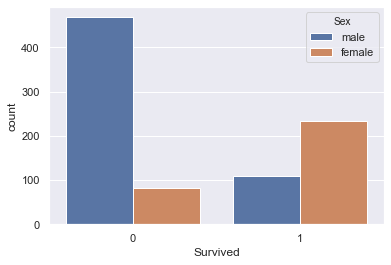

In [14]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df_tr)
plt.show()

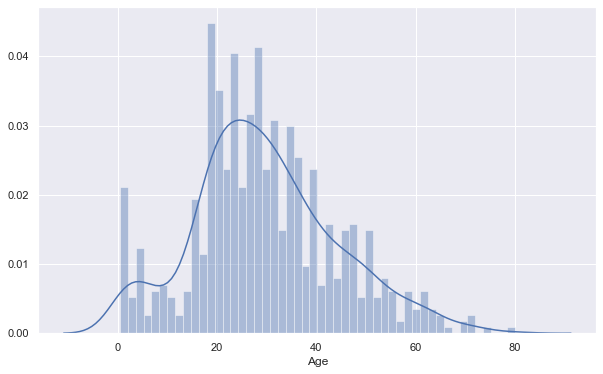

In [15]:
plt.subplots(figsize=(10, 6))
sns.distplot(df_tr['Age'],bins=50)
plt.show()

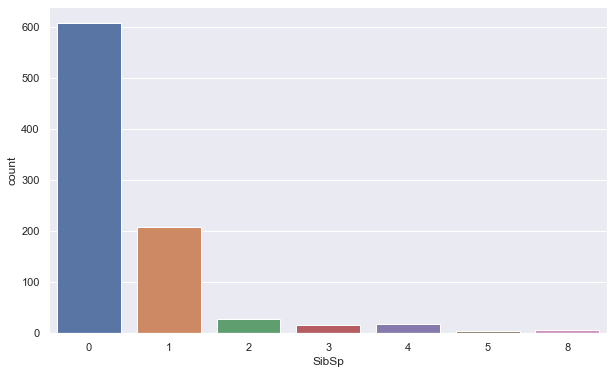

In [16]:
plt.subplots(figsize=(10, 6))
sns.countplot(df_tr['SibSp'],palette='deep')
plt.show()

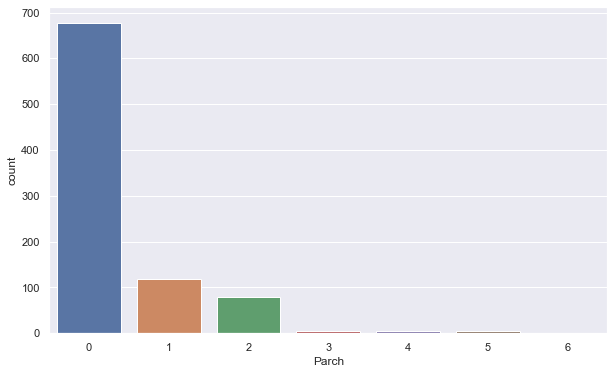

In [17]:
plt.subplots(figsize=(10, 6))
sns.countplot(df_tr['Parch'],palette='deep')
plt.show()

In [18]:
display(df_tr['Ticket'].value_counts())

1601                  7
CA. 2343              7
347082                7
347088                6
CA 2144               6
                     ..
341826                1
347073                1
SOTON/O.Q. 3101312    1
A/4. 20589            1
345765                1
Name: Ticket, Length: 681, dtype: int64

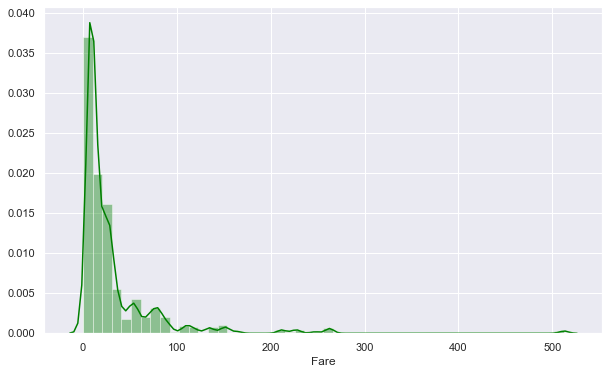

In [19]:
plt.subplots(figsize=(10, 6))
sns.distplot(df_tr['Fare'],bins=50, color='green')
plt.show()

In [20]:
display(df_tr['Cabin'].value_counts())

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
E101           3
              ..
C99            1
B94            1
C47            1
A31            1
B86            1
Name: Cabin, Length: 147, dtype: int64

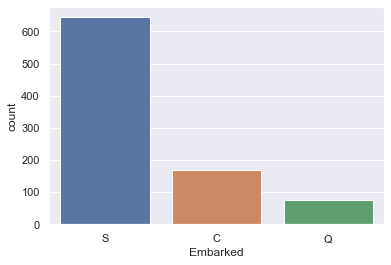

In [21]:
sns.countplot(df_tr['Embarked'])

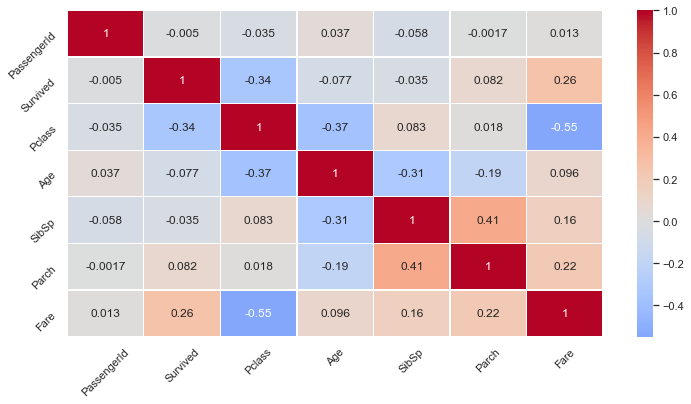

In [22]:
corrmat=df_tr.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corrmat, annot=True, linewidths=0.2,cmap='coolwarm', center=0)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [23]:
df_tr['Age'].fillna(df_tr.Age.median(), inplace=True)
print(df_tr['Age'].isna().sum())

0


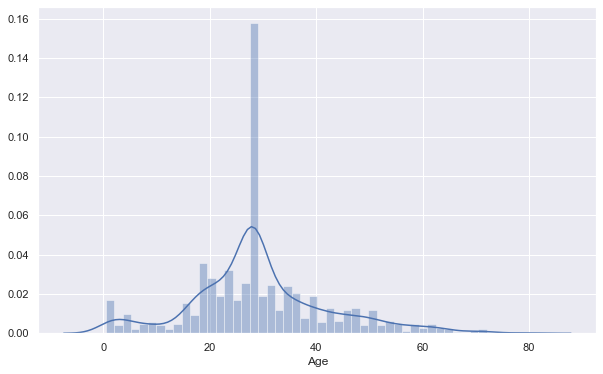

In [24]:
plt.subplots(figsize=(10, 6))
sns.distplot(df_tr['Age'],bins=50)
plt.show()

In [25]:
df_tr.drop('Cabin', axis = 1, inplace = True)

In [26]:
df_tr['Embarked'].fillna(mode(df_tr['Embarked']), inplace=True)
print(df_tr['Embarked'].isna().sum())

0


In [27]:
df_tr['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
df_tr['Sex']=df_tr['Sex'].map({'male': 1, 'female':0})
df_tr['Sex'].value_counts(normalize=True)

1    0.647587
0    0.352413
Name: Sex, dtype: float64

In [29]:
df_tr['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df_tr['Embarked']=df_tr['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})
df_tr['Embarked'].value_counts(normalize=True)

0    0.725028
1    0.188552
2    0.086420
Name: Embarked, dtype: float64

In [31]:
df_tr.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_tr.drop(['Survived'], axis = 1), 
                                                    df_tr['Survived'], test_size = 0.2, 
                                                    random_state = 42)

In [33]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [34]:
print(accuracy_score(y_test, y_pred))

0.7988826815642458
